In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Problem 1

### Hypothesis Testing using Simulation (10 pts)
The dataset iris contains measurements on three species of iris flowers. In this assignment, you’ll focus only on the 50 observations with Species == "versicolor". Complete both of the following tasks and report results and interpretations.
A botanist claims that the average sepal length of her Iris versicolor plants is 5.5 cm. You will test this claim via simulation.

In [22]:
iris = load_iris(as_frame=True)
df = iris.frame
df=df[df['target'] == 1] # only versicolor
observed_mean = df['sepal length (cm)'].mean()
print(observed_mean)

5.936


In [47]:
observed_mean = df['sepal length (cm)'].mean()
num_simulations = 10000
n = len(df)
sample_std = np.std(df.values, ddof=1)
print(sample_std)

CLAIMED_MEAN = 5.5

simulated_means = np.random.normal(loc=CLAIMED_MEAN, scale=sample_std/np.sqrt(n), size=num_simulations)


1.8830328437823523


In [48]:
extreme_count = np.sum(np.abs(simulated_means - 5.5) >= np.abs(observed_mean - 5.5))
p_value = extreme_count / num_simulations
print(f"p-value: {p_value}")

p-value: 0.1007


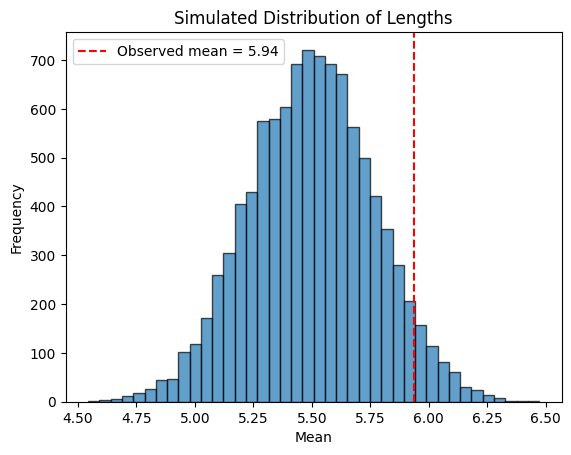

In [50]:
plt.hist(simulated_means, bins=40, alpha=0.7, edgecolor='black')
plt.axvline(observed_mean, color='red', linestyle='--', label=f'Observed mean = {observed_mean:.2f}')
plt.title("Simulated Distribution of Lengths")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Intepretation and Results

The actual observed mean of the data was 5.94 with a standard deviation of 1.88.

In order to test the assumption that the true mean was 5.5, I ran 1,000 simulations. This resulted in a p-value of about 0.108. Since 0.108 > 0.05, we **fail** to reject the null hypothesis. There is not enough evidence to determine if the true mean is different from 5.5.

# Problem 2

### Simple linear regression: investigate if wind speed largely explains ozone variation
a. Initial exploration - make a scatterplot and calculate correlation coefficient to identify the strength of their relationship.

b. Fit a model, write down the fitted model and interpret: the coefficient estimates, model performance.

c. Predict the ozone concentration when wind = 10 mph.

d. Check model assumptions using diagnostic plots.
### Multiple Linear regression: include wind speed, temperature and solar radiation to improve predictions
a. Multicollinearity check using pairwise correlation plot.

b. Fit a model, write down the fitted model and interpret: the coefficient estimates, model performance.

c. Check model assumptions using diagnostic plots.

In [2]:
df = pd.read_csv('airquality.csv')
